In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pyspark.sql import functions as F
import matplotlib.patches as mpatches

In [0]:
#1 - Quais as TOP 10 cidades mais Violentos do Brasil? 
#Removendo da consulta os conflitos considerados protestos pacíficos
 
df_conflito_gold_sql_10 = spark.sql('''select conflito.ID_CITY, count(*) as CONFLITOS_VIOLENTOS from gold.conflito
where conflito.SUB_TIPO_EVENTO <> 'Peaceful protest'
group by conflito.ID_CITY order by 2 desc
LIMIT 10''')

print('\033[1m1 - Quais as TOP 10 cidades mais Violentos do Brasil?\033[0m')
display(df_conflito_gold_sql_10)

1 - Quais as TOP 10 cidades mais Violentos do Brasil?


ID_CITY,CONFLITOS_VIOLENTOS
RIO DE JANEIRO,5973
MANAUS,2574
BELEM,1584
SAO PAULO,954
BOA VISTA,870
SALVADOR,836
BELFORD ROXO,825
CAMPO GRANDE,792
MACEIO,774
RIO BRANCO,636


Out[36]: Text(0.5, 1.0, 'Quais as TOP 10 cidades mais Violentos do Brasil?')

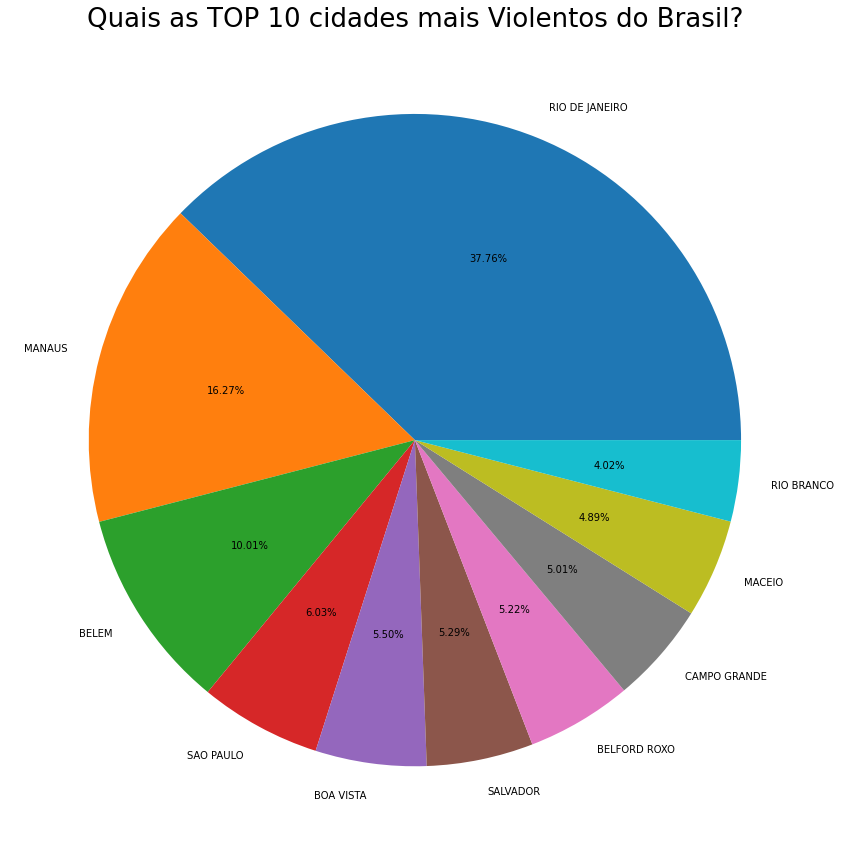

In [0]:
labels = df_conflito_gold_sql_10.agg(F.collect_list(F.col('ID_CITY'))).collect()[0][0]
vals = df_conflito_gold_sql_10.agg(F.collect_list(F.col('CONFLITOS_VIOLENTOS'))).collect()[0][0]
explode = (0.1,0,0,0,0,0,0,0,0,0)
fig, ax = plt.subplots(figsize=(22,15))
ax.pie(vals, labels=labels, autopct='%.2f%%')
ax.set_title('Quais as TOP 10 cidades mais Violentos do Brasil?', fontsize='26')

In [0]:
# 2- Que tipo de conflitos são mais comuns nessas cidades ?

top_10_cidades = df_conflito_gold_sql_10.select('ID_CITY')
top_10_cidades_list = top_10_cidades.agg(F.collect_list(F.col("ID_CITY"))).collect()[0][0]

df_conflito_gold_sql_tipo = spark.sql('''select conflito.ID_CITY, conflito.TIPO_EVENTO, conflito.SUB_TIPO_EVENTO, count(*) 
from gold.conflito
where conflito.SUB_TIPO_EVENTO <> 'Peaceful protest' 
group by conflito.ID_CITY, conflito.TIPO_EVENTO, conflito.SUB_TIPO_EVENTO order by 1,4 desc''')

print('\033[1m2 - Que tipo de conflitos são mais comuns nessas cidades?\033[0m')

for row in top_10_cidades.collect():
    df = df_conflito_gold_sql_tipo.where(df_conflito_gold_sql_tipo.ID_CITY == row["ID_CITY"])
    display(df)

2 - Que tipo de conflitos são mais comuns nessas cidades?


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
RIO DE JANEIRO,Battles,Armed clash,5379
RIO DE JANEIRO,Violence against civilians,Attack,268
RIO DE JANEIRO,Riots,Violent demonstration,98
RIO DE JANEIRO,Strategic developments,Looting/property destruction,51
RIO DE JANEIRO,Strategic developments,Arrests,45
RIO DE JANEIRO,Riots,Mob violence,38
RIO DE JANEIRO,Explosions/Remote violence,Remote explosive/landmine/IED,27
RIO DE JANEIRO,Protests,Protest with intervention,20
RIO DE JANEIRO,Violence against civilians,Abduction/forced disappearance,18
RIO DE JANEIRO,Strategic developments,Change to group/activity,12


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
MANAUS,Violence against civilians,Attack,1512
MANAUS,Battles,Armed clash,703
MANAUS,Riots,Mob violence,260
MANAUS,Riots,Violent demonstration,44
MANAUS,Strategic developments,Looting/property destruction,19
MANAUS,Strategic developments,Arrests,11
MANAUS,Violence against civilians,Sexual violence,7
MANAUS,Violence against civilians,Abduction/forced disappearance,7
MANAUS,Protests,Protest with intervention,4
MANAUS,Strategic developments,Disrupted weapons use,3


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
BELEM,Violence against civilians,Attack,900
BELEM,Battles,Armed clash,429
BELEM,Riots,Violent demonstration,177
BELEM,Riots,Mob violence,36
BELEM,Protests,Protest with intervention,18
BELEM,Strategic developments,Arrests,15
BELEM,Strategic developments,Looting/property destruction,6
BELEM,Strategic developments,Disrupted weapons use,3


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
SAO PAULO,Battles,Armed clash,465
SAO PAULO,Violence against civilians,Attack,256
SAO PAULO,Riots,Violent demonstration,86
SAO PAULO,Riots,Mob violence,57
SAO PAULO,Protests,Protest with intervention,23
SAO PAULO,Strategic developments,Arrests,22
SAO PAULO,Strategic developments,Looting/property destruction,20
SAO PAULO,Violence against civilians,Abduction/forced disappearance,13
SAO PAULO,Explosions/Remote violence,Remote explosive/landmine/IED,4
SAO PAULO,Protests,Excessive force against protesters,3


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
BOA VISTA,Violence against civilians,Attack,514
BOA VISTA,Battles,Armed clash,206
BOA VISTA,Riots,Mob violence,100
BOA VISTA,Strategic developments,Looting/property destruction,14
BOA VISTA,Riots,Violent demonstration,12
BOA VISTA,Violence against civilians,Abduction/forced disappearance,10
BOA VISTA,Explosions/Remote violence,Remote explosive/landmine/IED,4
BOA VISTA,Violence against civilians,Sexual violence,4
BOA VISTA,Strategic developments,Arrests,2
BOA VISTA,Explosions/Remote violence,Grenade,2


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
SALVADOR,Battles,Armed clash,529
SALVADOR,Violence against civilians,Attack,180
SALVADOR,Riots,Violent demonstration,80
SALVADOR,Explosions/Remote violence,Remote explosive/landmine/IED,15
SALVADOR,Riots,Mob violence,10
SALVADOR,Strategic developments,Looting/property destruction,10
SALVADOR,Protests,Protest with intervention,4
SALVADOR,Violence against civilians,Abduction/forced disappearance,4
SALVADOR,Strategic developments,Arrests,3
SALVADOR,Violence against civilians,Sexual violence,1


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
BELFORD ROXO,Battles,Armed clash,785
BELFORD ROXO,Violence against civilians,Attack,26
BELFORD ROXO,Riots,Violent demonstration,5
BELFORD ROXO,Strategic developments,Other,2
BELFORD ROXO,Riots,Mob violence,2
BELFORD ROXO,Violence against civilians,Sexual violence,1
BELFORD ROXO,Strategic developments,Non-violent transfer of territory,1
BELFORD ROXO,Strategic developments,Arrests,1
BELFORD ROXO,Strategic developments,Change to group/activity,1
BELFORD ROXO,Protests,Excessive force against protesters,1


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
CAMPO GRANDE,Violence against civilians,Attack,340
CAMPO GRANDE,Battles,Armed clash,214
CAMPO GRANDE,Strategic developments,Looting/property destruction,106
CAMPO GRANDE,Riots,Mob violence,92
CAMPO GRANDE,Riots,Violent demonstration,20
CAMPO GRANDE,Violence against civilians,Sexual violence,8
CAMPO GRANDE,Protests,Protest with intervention,4
CAMPO GRANDE,Violence against civilians,Abduction/forced disappearance,4
CAMPO GRANDE,Strategic developments,Arrests,2
CAMPO GRANDE,Strategic developments,Disrupted weapons use,2


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
MACEIO,Violence against civilians,Attack,369
MACEIO,Battles,Armed clash,231
MACEIO,Riots,Violent demonstration,85
MACEIO,Riots,Mob violence,72
MACEIO,Violence against civilians,Abduction/forced disappearance,5
MACEIO,Strategic developments,Arrests,4
MACEIO,Violence against civilians,Sexual violence,4
MACEIO,Protests,Protest with intervention,3
MACEIO,Strategic developments,Disrupted weapons use,1


ID_CITY,TIPO_EVENTO,SUB_TIPO_EVENTO,count(1)
RIO BRANCO,Violence against civilians,Attack,400
RIO BRANCO,Battles,Armed clash,170
RIO BRANCO,Riots,Violent demonstration,16
RIO BRANCO,Strategic developments,Arrests,12
RIO BRANCO,Riots,Mob violence,12
RIO BRANCO,Protests,Protest with intervention,10
RIO BRANCO,Violence against civilians,Abduction/forced disappearance,6
RIO BRANCO,Strategic developments,Looting/property destruction,4
RIO BRANCO,Protests,Excessive force against protesters,2
RIO BRANCO,Strategic developments,Other,2


In [0]:
# 3 - Quais principais atores estão envolvidos nesses conflitos?

from pyspark.sql.functions import *

print('\033[1m3 - Quais atores principais estão envolvidos nesses conflitos?\033[0m')

df_conflito_gold_sql_ator = spark.sql('''select conflito.ID_CITY, conflito.ATOR_PRIMARIO, count(*) as QTD 
from gold.conflito
where conflito.SUB_TIPO_EVENTO <> 'Peaceful protest'
group by conflito.ID_CITY, conflito.ATOR_PRIMARIO order by 3 desc   
''') 

for row in top_10_cidades.collect():
    df = df_conflito_gold_sql_ator.where(df_conflito_gold_sql_ator.ID_CITY == row["ID_CITY"])
    display(df.limit(10))

3 - Quais atores principais estão envolvidos nesses conflitos?


ID_CITY,ATOR_PRIMARIO,QTD
RIO DE JANEIRO,Unidentified Armed Group (Brazil),3215
RIO DE JANEIRO,Unidentified Gang and/or Police Militia,812
RIO DE JANEIRO,Military Forces of Brazil (2019-2022) Military Police,467
RIO DE JANEIRO,CV: Red Command,415
RIO DE JANEIRO,TCP: Pure Third Command,184
RIO DE JANEIRO,Military Forces of Brazil (2016-2018) Military Police,142
RIO DE JANEIRO,Rioters (Brazil),136
RIO DE JANEIRO,Police Forces of Brazil (2019-2022),133
RIO DE JANEIRO,Military Forces of Brazil (2019-2022) UPP: Pacifying Police Unit,114
RIO DE JANEIRO,Police Forces of Brazil (2019-2022) Civil Police,73


ID_CITY,ATOR_PRIMARIO,QTD
MANAUS,Unidentified Gang and/or Police Militia,1038
MANAUS,Unidentified Gang (Brazil),526
MANAUS,Unidentified Armed Group (Brazil),362
MANAUS,Rioters (Brazil),304
MANAUS,Military Forces of Brazil (2019-2022) Military Police,181
MANAUS,CV: Red Command,53
MANAUS,FDN: Family of the North,28
MANAUS,PCC: First Capital Command,17
MANAUS,Military Forces of Brazil (2016-2018) Military Police,16
MANAUS,Police Forces of Brazil (2019-2022) Civil Police,13


ID_CITY,ATOR_PRIMARIO,QTD
BELEM,Unidentified Gang and/or Police Militia,807
BELEM,Rioters (Brazil),213
BELEM,Unidentified Armed Group (Brazil),201
BELEM,Military Forces of Brazil (2019-2022) Military Police,177
BELEM,Unidentified Gang (Brazil),93
BELEM,Military Forces of Brazil (2016-2018) Military Police,21
BELEM,Protesters (Brazil),18
BELEM,Police Forces of Brazil (2019-2022) Civil Police,18
BELEM,Police Forces of Brazil (2016-2018) Civil Police,9
BELEM,Police Militia,6


ID_CITY,ATOR_PRIMARIO,QTD
SAO PAULO,Unidentified Armed Group (Brazil),375
SAO PAULO,Rioters (Brazil),143
SAO PAULO,Unidentified Gang and/or Police Militia,133
SAO PAULO,Military Forces of Brazil (2019-2022) Military Police,124
SAO PAULO,Unidentified Gang (Brazil),37
SAO PAULO,Police Forces of Brazil (2019-2022) Civil Police,28
SAO PAULO,Protesters (Brazil),26
SAO PAULO,PCC: First Capital Command,17
SAO PAULO,Military Forces of Brazil (2016-2018) Military Police,13
SAO PAULO,Police Forces of Brazil (2019-2022),11


ID_CITY,ATOR_PRIMARIO,QTD
BOA VISTA,Unidentified Gang and/or Police Militia,314
BOA VISTA,Unidentified Gang (Brazil),202
BOA VISTA,Rioters (Brazil),108
BOA VISTA,Unidentified Armed Group (Brazil),102
BOA VISTA,PCC: First Capital Command,44
BOA VISTA,Military Forces of Brazil (2019-2022) Military Police,40
BOA VISTA,Unidentified Armed Group (Venezuela),14
BOA VISTA,Military Forces of Brazil (2016-2018) Military Police,12
BOA VISTA,CV: Red Command,8
BOA VISTA,Unidentified Gang and/or Colectivo,6


ID_CITY,ATOR_PRIMARIO,QTD
SALVADOR,Military Forces of Brazil (2019-2022) Military Police,289
SALVADOR,Unidentified Gang (Brazil),153
SALVADOR,Unidentified Gang and/or Police Militia,112
SALVADOR,Rioters (Brazil),90
SALVADOR,Unidentified Armed Group (Brazil),74
SALVADOR,Military Forces of Brazil (2016-2018) Military Police,46
SALVADOR,BDM: Bonde do Maluco,17
SALVADOR,Police Forces of Brazil (2019-2022) Civil Police,15
SALVADOR,CV: Red Command,10
SALVADOR,Katiara Gang,5


ID_CITY,ATOR_PRIMARIO,QTD
BELFORD ROXO,Unidentified Armed Group (Brazil),625
BELFORD ROXO,Military Forces of Brazil (2019-2022) Military Police,65
BELFORD ROXO,Unidentified Gang and/or Police Militia,49
BELFORD ROXO,Police Forces of Brazil (2019-2022),29
BELFORD ROXO,TCP: Pure Third Command,20
BELFORD ROXO,CV: Red Command,15
BELFORD ROXO,Rioters (Brazil),7
BELFORD ROXO,Military Forces of Brazil (2016-2018) Military Police,5
BELFORD ROXO,Police Forces of Brazil (2016-2018),4
BELFORD ROXO,Police Forces of Brazil (2016-2018) Civil Police,1


ID_CITY,ATOR_PRIMARIO,QTD
CAMPO GRANDE,Unidentified Gang and/or Police Militia,264
CAMPO GRANDE,Rioters (Brazil),112
CAMPO GRANDE,Unidentified Gang (Brazil),104
CAMPO GRANDE,Military Forces of Brazil (2019-2022) Military Police,88
CAMPO GRANDE,Unidentified Armed Group (Brazil),64
CAMPO GRANDE,PCC: First Capital Command,62
CAMPO GRANDE,Police Forces of Brazil (2019-2022) Civil Police,30
CAMPO GRANDE,Police Forces of Brazil (2019-2022) Federal Police,22
CAMPO GRANDE,Police Forces of Brazil (2016-2018) Federal Police,16
CAMPO GRANDE,Military Forces of Brazil (2016-2018) Military Police,10


ID_CITY,ATOR_PRIMARIO,QTD
MACEIO,Unidentified Gang and/or Police Militia,240
MACEIO,Rioters (Brazil),157
MACEIO,Unidentified Armed Group (Brazil),152
MACEIO,Unidentified Gang (Brazil),110
MACEIO,Military Forces of Brazil (2019-2022) Military Police,67
MACEIO,Military Forces of Brazil (2016-2018) Military Police,28
MACEIO,Police Forces of Brazil (2016-2018),5
MACEIO,Protesters (Brazil),3
MACEIO,Police Forces of Brazil (2019-2022),2
MACEIO,Police Forces of Brazil (2019-2022) Federal Police,2


ID_CITY,ATOR_PRIMARIO,QTD
RIO BRANCO,Unidentified Gang and/or Police Militia,258
RIO BRANCO,Unidentified Gang (Brazil),188
RIO BRANCO,Unidentified Armed Group (Brazil),60
RIO BRANCO,Rioters (Brazil),28
RIO BRANCO,Military Forces of Brazil (2019-2022) Military Police,24
RIO BRANCO,CV: Red Command,22
RIO BRANCO,B13: Tram of 13,16
RIO BRANCO,Military Forces of Brazil (2016-2018) Military Police,14
RIO BRANCO,Protesters (Brazil),12
RIO BRANCO,Police Forces of Brazil (2019-2022) Federal Police,6


In [0]:
# 4- Qual as cidades mais letais do Brasil?

print('\033[1m4- Qual as cidades mais letais do Brasil?\033[0m')

df_conflito_gold_sql_letal = spark.sql('''select conflito.ID_CITY, sum(conflito.FATALIDADE) as TOTAL_MORTES
from gold.conflito
where conflito.SUB_TIPO_EVENTO <> 'Peaceful protest' and conflito.FATALIDADE <> 0
group by conflito.ID_CITY order by 2 desc
limit 10
''') 

display(df_conflito_gold_sql_letal)



4- Qual as cidades mais letais do Brasil?


ID_CITY,TOTAL_MORTES
MANAUS,2344
RIO DE JANEIRO,1801
BELEM,1665
SALVADOR,799
BOA VISTA,620
FEIRA DE SANTANA,599
RIO BRANCO,580
MACAPA,565
FORTALEZA,526
MACEIO,478


Out[40]: Text(0.5, 1.0, '4- Quais as cidades mais letais do Brasil?')

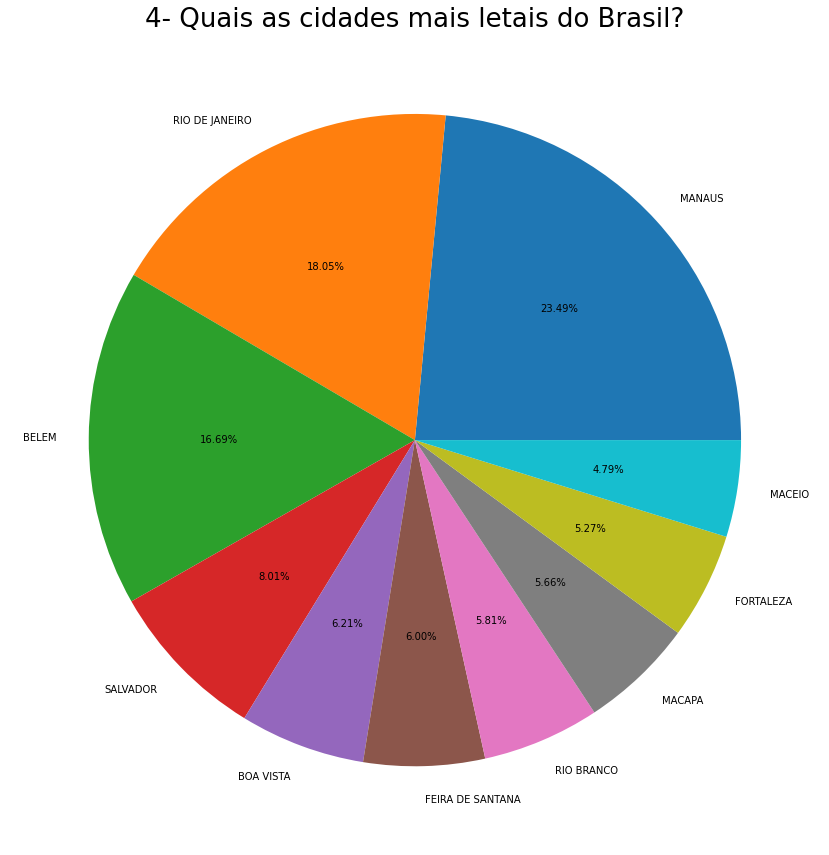

In [0]:
labels = df_conflito_gold_sql_letal.agg(F.collect_list(F.col('ID_CITY'))).collect()[0][0]
vals = df_conflito_gold_sql_letal.agg(F.collect_list(F.col('TOTAL_MORTES'))).collect()[0][0]
explode = (0.1,0,0,0,0,0,0,0,0,0)
fig, ax = plt.subplots(figsize=(22,15))
ax.pie(vals, labels=labels, autopct='%.2f%%')
ax.set_title('4- Quais as cidades mais letais do Brasil?', fontsize='26')

In [0]:
# 5- Qual ano obteve maior fatalidade ?

print('\033[1m5- Qual ano obteve maior fatalidade?\033[0m')

df_conflito_gold_sql_ano = spark.sql('''select conflito.ANO, sum(conflito.FATALIDADE) as TOTAL_MORTES
from gold.conflito
where conflito.SUB_TIPO_EVENTO <> 'Peaceful protest' and conflito.FATALIDADE <> 0
group by conflito.ANO order by 1
''') 

display(df_conflito_gold_sql_ano)

5- Qual ano obteve maior fatalidade?


ANO,TOTAL_MORTES
2018,7121
2019,5274
2020,5283
2021,5759
2022,6793
2023,347


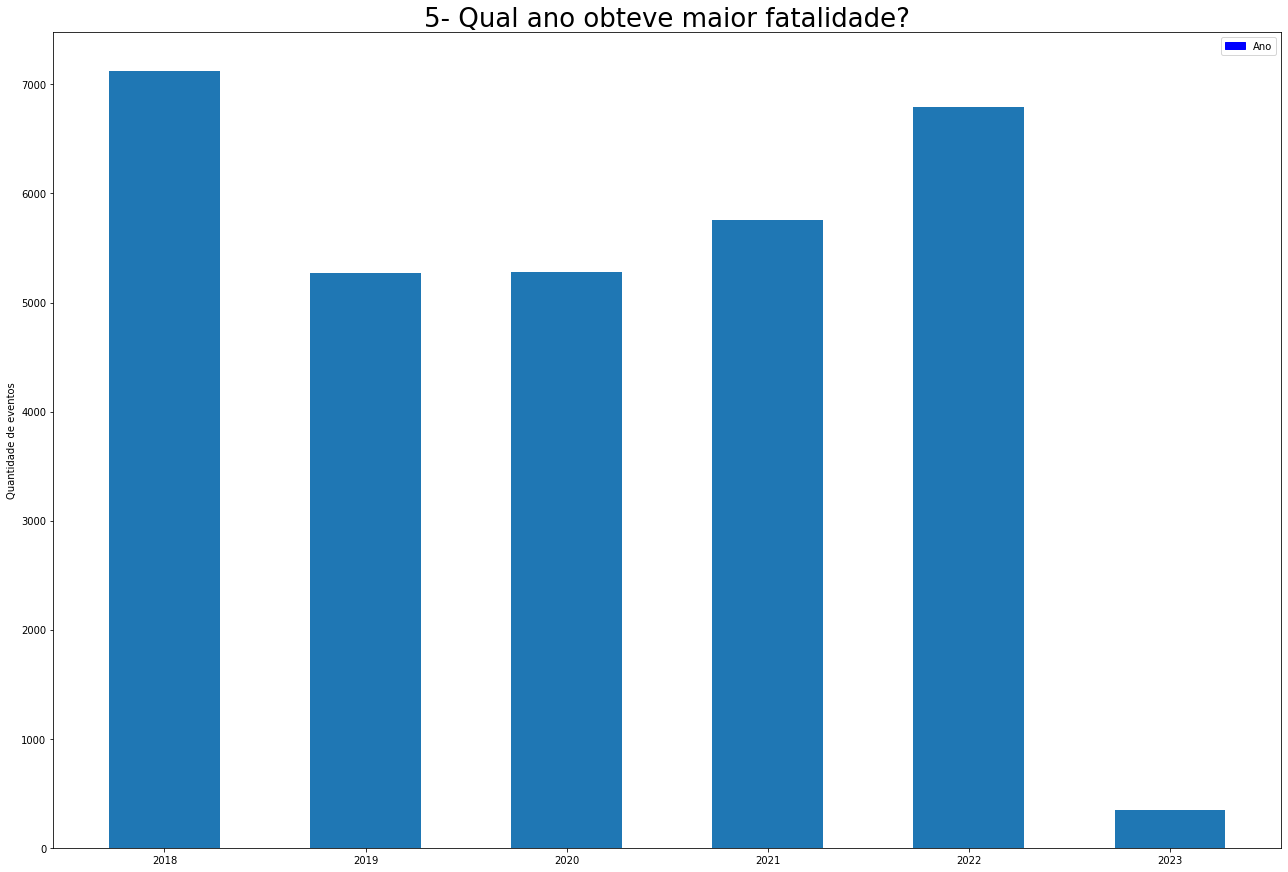

In [0]:

labels = df_conflito_gold_sql_ano.agg(F.collect_list(F.col('ANO'))).collect()[0][0]
vals = df_conflito_gold_sql_ano.agg(F.collect_list(F.col('TOTAL_MORTES'))).collect()[0][0]
fig, ax = plt.subplots(figsize=(22,15))

ax.bar(labels,vals, 0.55, label='Ano')
ax.set_title('5- Qual ano obteve maior fatalidade?', fontsize='26')
ax.set_ylabel('Quantidade de eventos')
red_patch = mpatches.Patch(color='blue', label='Ano')
ax.legend(handles=[red_patch])
plt.show()

